In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd
import matplotlib
from matplotlib import patches
from sympy import *
import datetime
from functools import reduce
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import scipy

import sys

import itertools
from scipy.special import binom
from scipy.stats import ortho_group

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

from itertools import cycle

## sign_sgd_one_point_majority_log-reg_var

In [22]:
%%bash

mpirun -n 4 python3 sign_sgd_majority.py --upd_option one_point --loss_func log-reg --step_type var-step --dataset mushrooms  --max_it 2 --gamma_0 1 



Process is interrupted.


[]

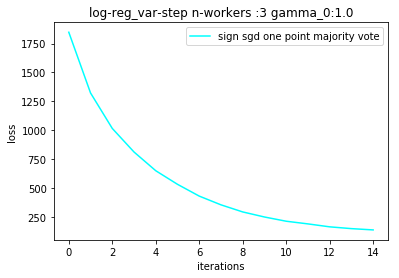

In [38]:
project_path = "/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/"
dataset = "mushrooms"
logs_path = project_path + "logs_{0}/".format(dataset)

info_str = []

name = "info_str_sign_sgd_majority_one-point_log-reg_var-step_3_1,0_1.txt"

#load string invormation
with open(name, 'r') as filehandle:  
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        info_str.append(currentPlace)

#load numeric invormation
info_num = np.load(logs_path + "info_number.npy")

experiment_name, project_path, logs_path, dataset, loss_func = info_str
stepsize, n_workers, gamma_0, batch = info_num
experiment = '{0}_{1}_{2}_{3}_{4}_{5}'.format(experiment_name, loss_func, stepsize, n_workers, gamma_0, batch)

loss_ar = np.load(logs_path + 'loss' + '_' + experiment + ".npy")
time_ar = np.load(logs_path + 'time' + '_' + experiment + ".npy")
its_ar = np.load(logs_path + 'iteration' + '_' + experiment + ".npy")
w_ar = np.load(logs_path + 'iterates' + '_' + experiment + ".npy")


colors = cycle(['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red'])

x_ar   = [its_ar]
y_ar = [loss_ar]

label_ar = ["sign sgd one point majority vote"]
marker_ar = ["o-"]

plt.plot(its_ar[:np.argmin (loss_ar)], loss_ar[:np.argmin (loss_ar)], color=color, label=str(label_ar[0]))

plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('{0}_{1} n-workers :{2} gamma_0:{3}'.format( loss_func, stepsize, n_workers, gamma_0 ))
plt.legend(loc="upper right")
plt.plot()


In [41]:
if 1 not in [0,2]: 
    print("lol") 

lol


[]

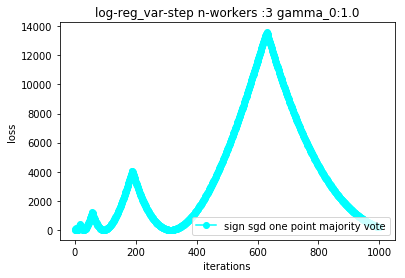

In [30]:
colors = cycle(['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red'])

x_ar   = [its_ar]
y_ar = [loss_ar]

label_ar = ["sign sgd one point majority vote"]
marker_ar = ["o-"]

plt.plot(x_ar[0], y_ar[0],  marker_ar[0], color=color, label=str(label_ar[0]))

plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('{0}_{1} n-workers :{2} gamma_0:{3}'.format( loss_func, stepsize, n_workers, gamma_0 ))
plt.legend(loc="lower right")
plt.plot()

    


TypeError: 'AxesSubplot' object is not subscriptable

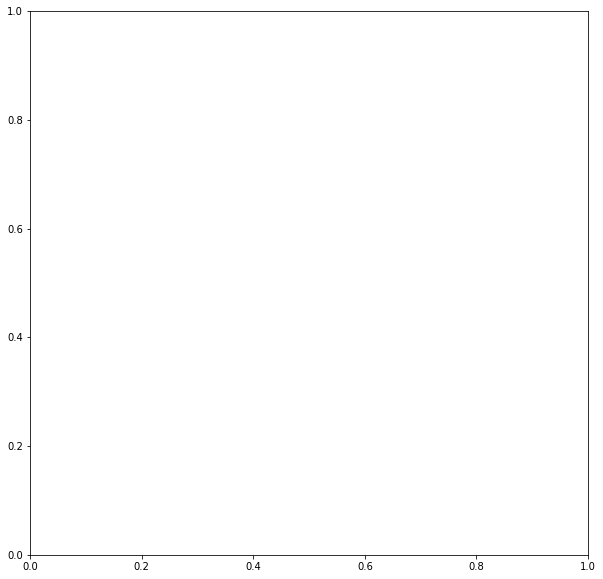

In [15]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])

x_ar   = [its_ar]
y_ar = [loss_ar]

label_ar = ["sign sgd one point majority vote"]
marker_ar = ["o-"]

n_col = 1
n_row = 1
f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (x, y, label, color, marker) in enumerate(zip(x_ar, y_ar, label_ar, colors, marker_ar)):
        axarr[i, j].plot(x, y, color=color, marker=marker, label=str(label_ar[k]))
                         
    axarr[i, j].set_title('{0}_{1} n-workers :{2} gamma_0:{3}'.format( loss_func, stepsize, n_workers, gamma_0 ))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='iterations', ylabel='loss')

plt.show()

In [42]:
type("mushrooms")

str